# California Housing Prices - Exploratory Data Analysis (EDA)

In this notebook, we will perform Exploratory Data Analysis (EDA) on the housing dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

sns.set_style("whitegrid")

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

## Basics

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Summary** 
There are 20,640 observations and 10 attributes in the dataset. Among the 10 attributes, 9 of them are numeric, and 1 is categorical (ocean_proximity).

## Geographic Information

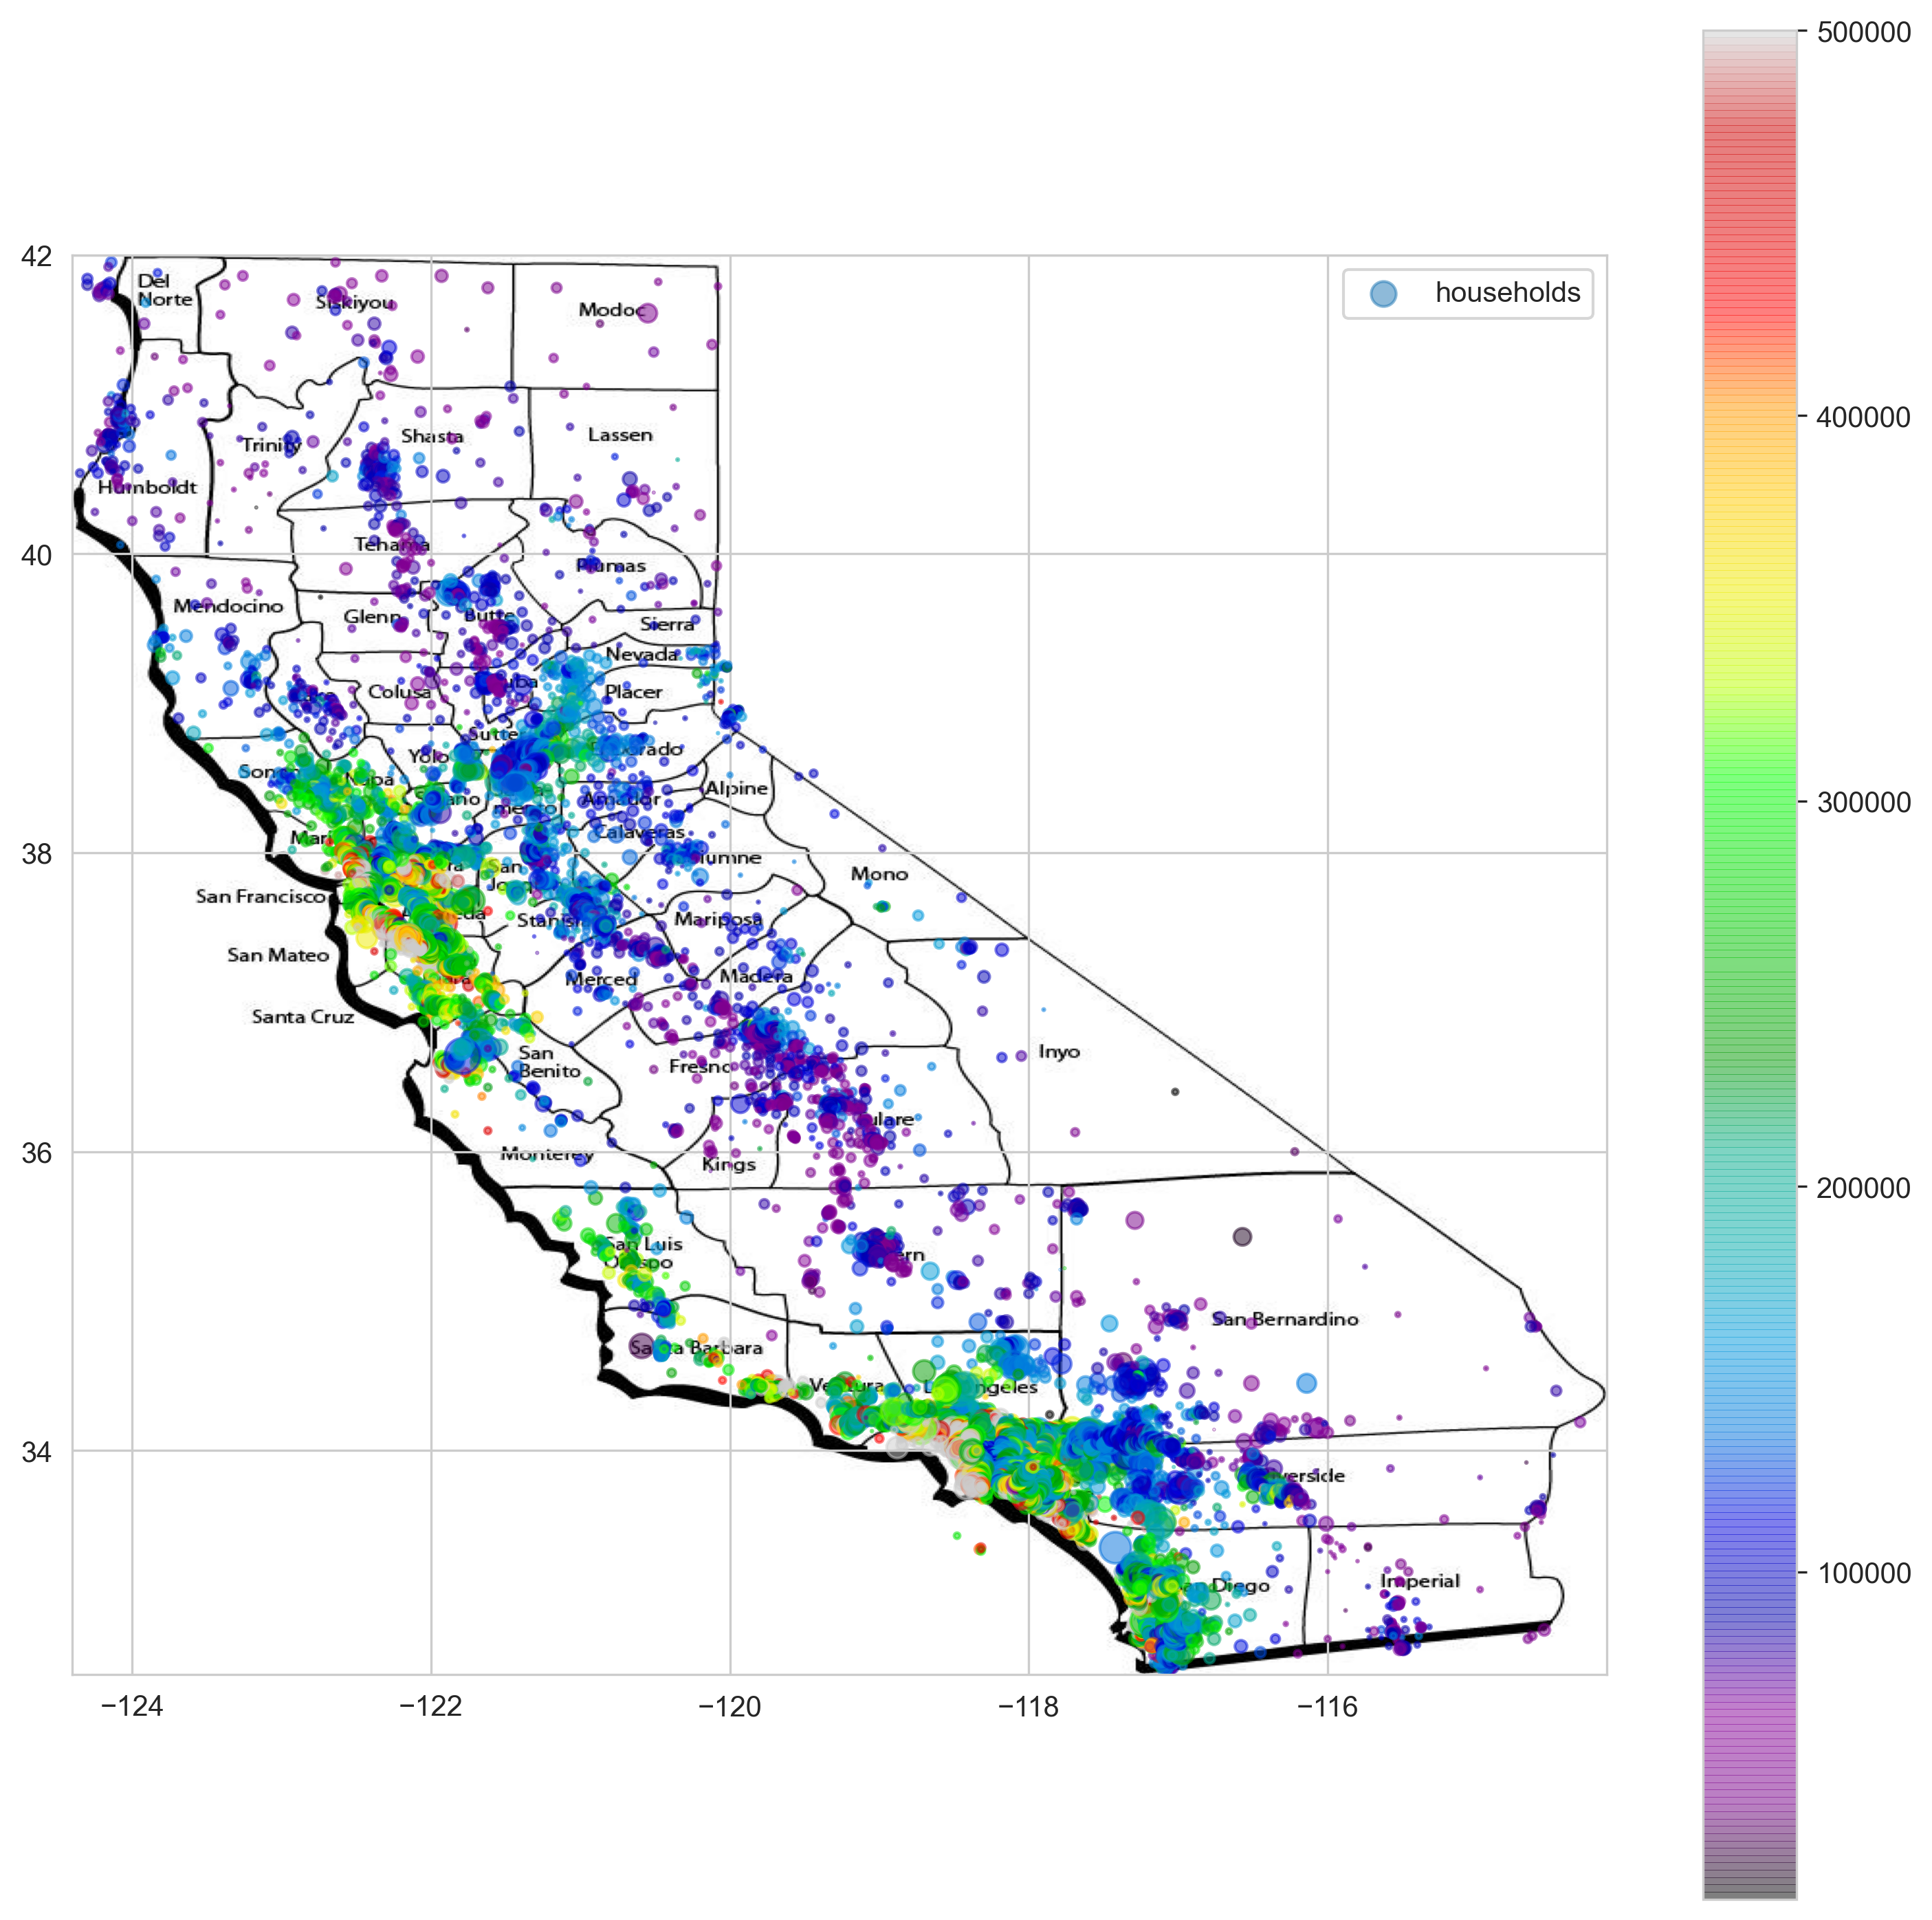

In [6]:
# Plot on house value and households on basemap 
def plot_house_value_household_on_basemap(data):
    plt.figure(figsize=(12, 12), dpi=300)
    img = plt.imread("california_county_map.jpeg")
# California coordinates range: 
# Longitude: 124° 24' W to 114° 8' W 
# Latitude: 32° 30' N to 42° N
    plt.imshow(img, zorder=0,extent=[-124.40, -114.13, 32.50, 42.00])

    plt.scatter(x=data["longitude"], y=data["latitude"], 
                c=data["median_house_value"],
                s=data["households"]/40, 
                cmap=plt.get_cmap("nipy_spectral"), 
                alpha=0.5, label="households")
    plt.colorbar()
    plt.legend()

plot_house_value_household_on_basemap(data)

**Summary**
The map shows that in genereal, regions near Pacific have more households and higher house values. As a comparison, household in the regions away from the Pacific are sparse, and the houses are less expensive.

## Skewness

In [7]:
numeric_columns = data.columns.tolist()
numeric_columns.remove("ocean_proximity")
numeric_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [8]:
data[numeric_columns].describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

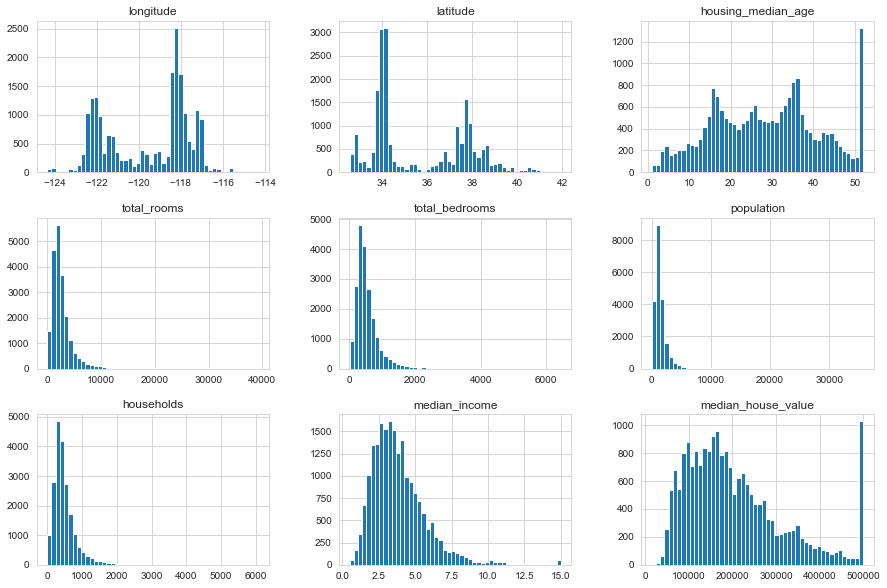

In [9]:
data[numeric_columns].hist(figsize=(15, 10), bins=50)

**Summary** 
The statistics and histograms of the nine numeric attributes show that most of them are not normally distributed, in other words, they are skewed to different extent.  

## Correlation

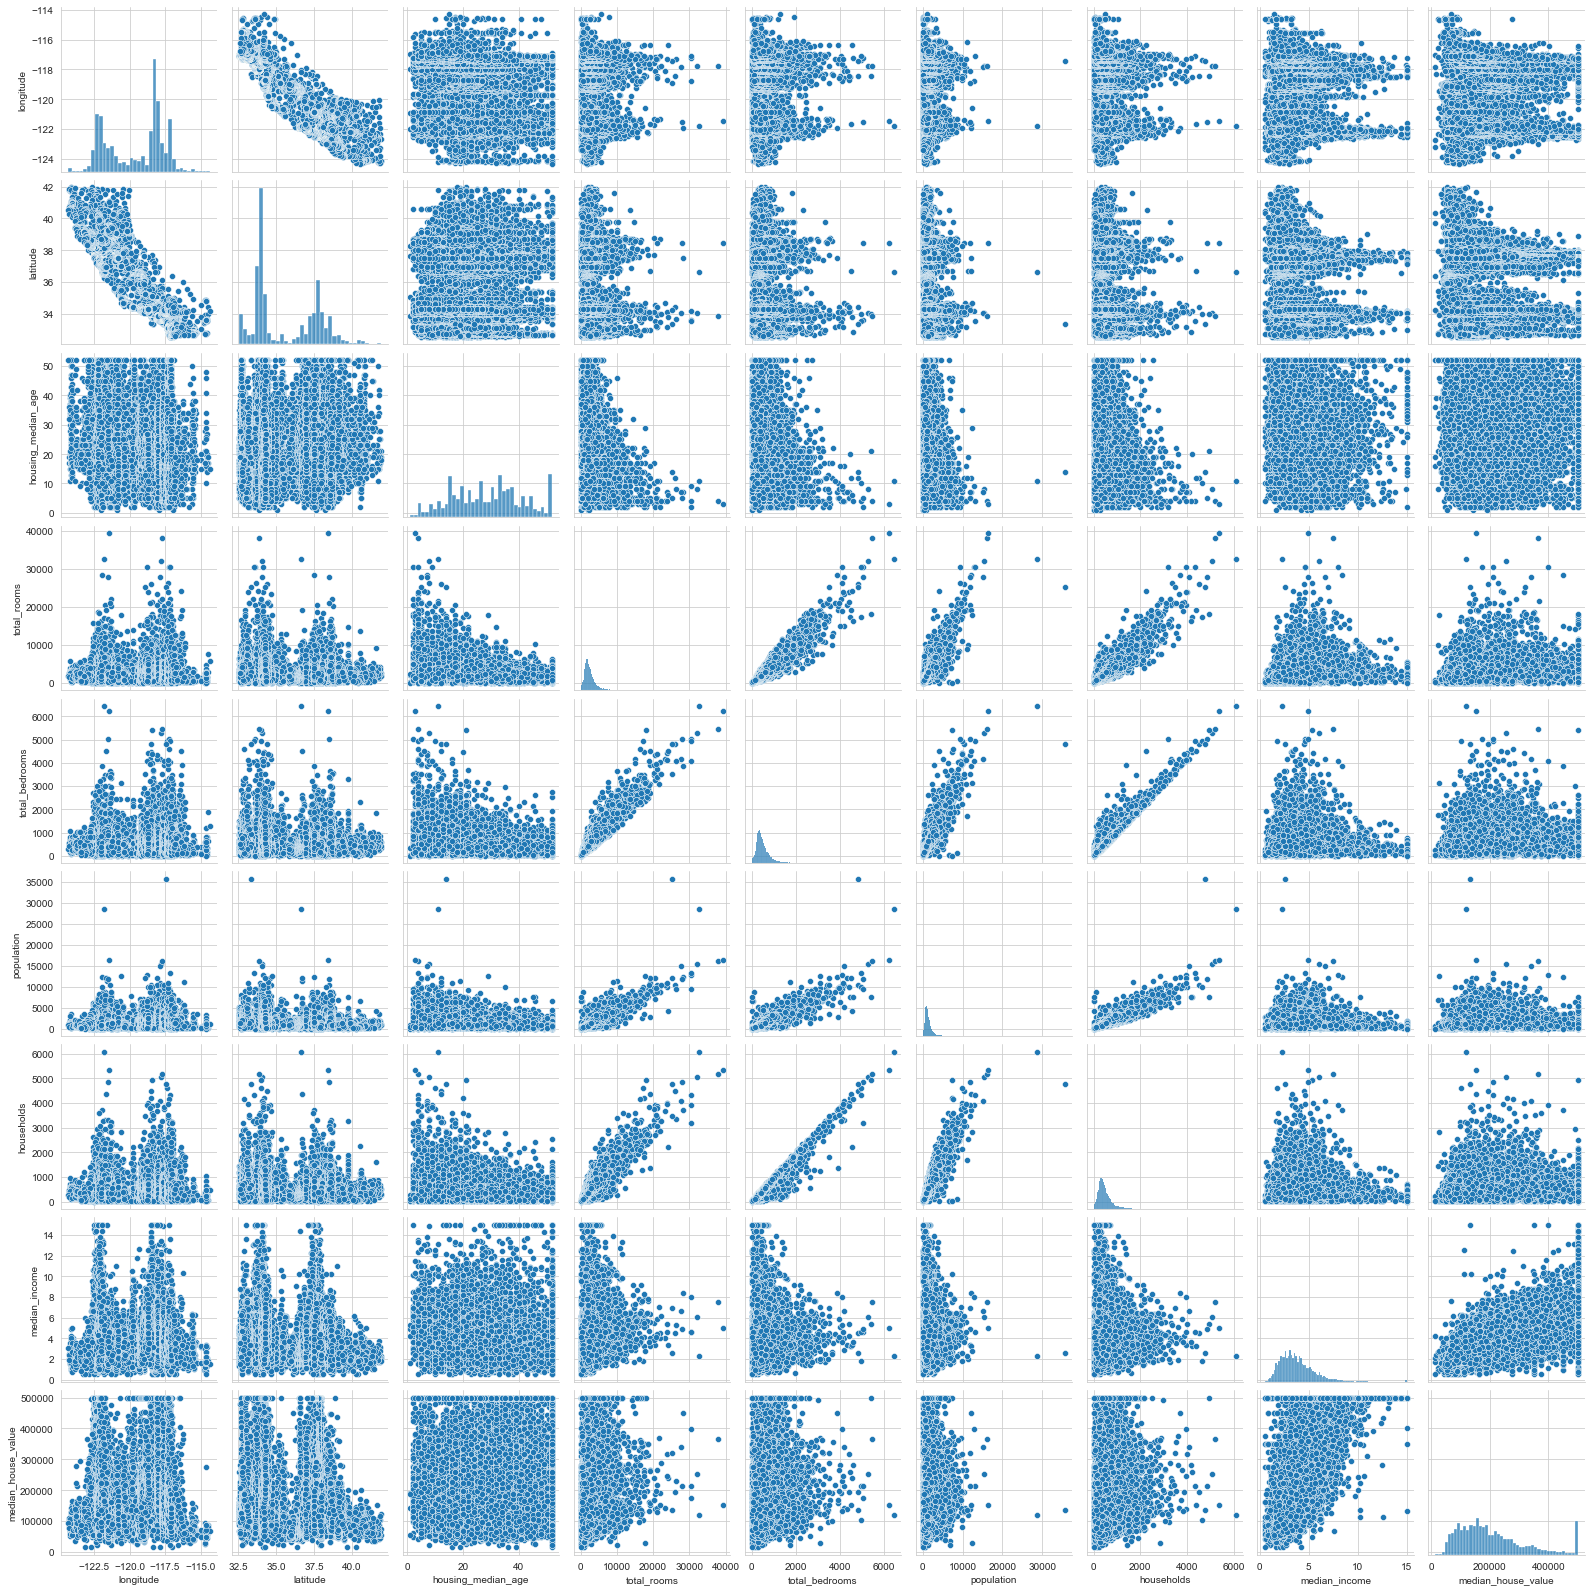

In [10]:
sns.pairplot(data[numeric_columns])

In [11]:
data[numeric_columns].corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

**Summary**
The pair-wise scatter plots and correlation coefficients show that some numeric predictors are correlated with each other, for instance,

- longitude and latitude
- total_rooms and total_bedrooms
- total_rooms and population
- total_rooms and households
- total_bedrooms and population
- total_bedrooms and households
- population and households
- median_income and median_house_value

In [12]:
data.corr()["median_house_value"].sort_values(ascending=False).to_frame("Correlation with median_house_value")

Correlation with median_house_value
median_house_value                             1.000000
median_income                                  0.688075
total_rooms                                    0.134153
housing_median_age                             0.105623
households                                     0.065843
total_bedrooms                                 0.049686
population                                    -0.024650
longitude                                     -0.045967
latitude                                      -0.144160

**Summary**
The median_income plays an important role while predicting the median_house_value as it is positively correlated to median_house_value with a 0.688 correlation coefficient.

## Outliers    

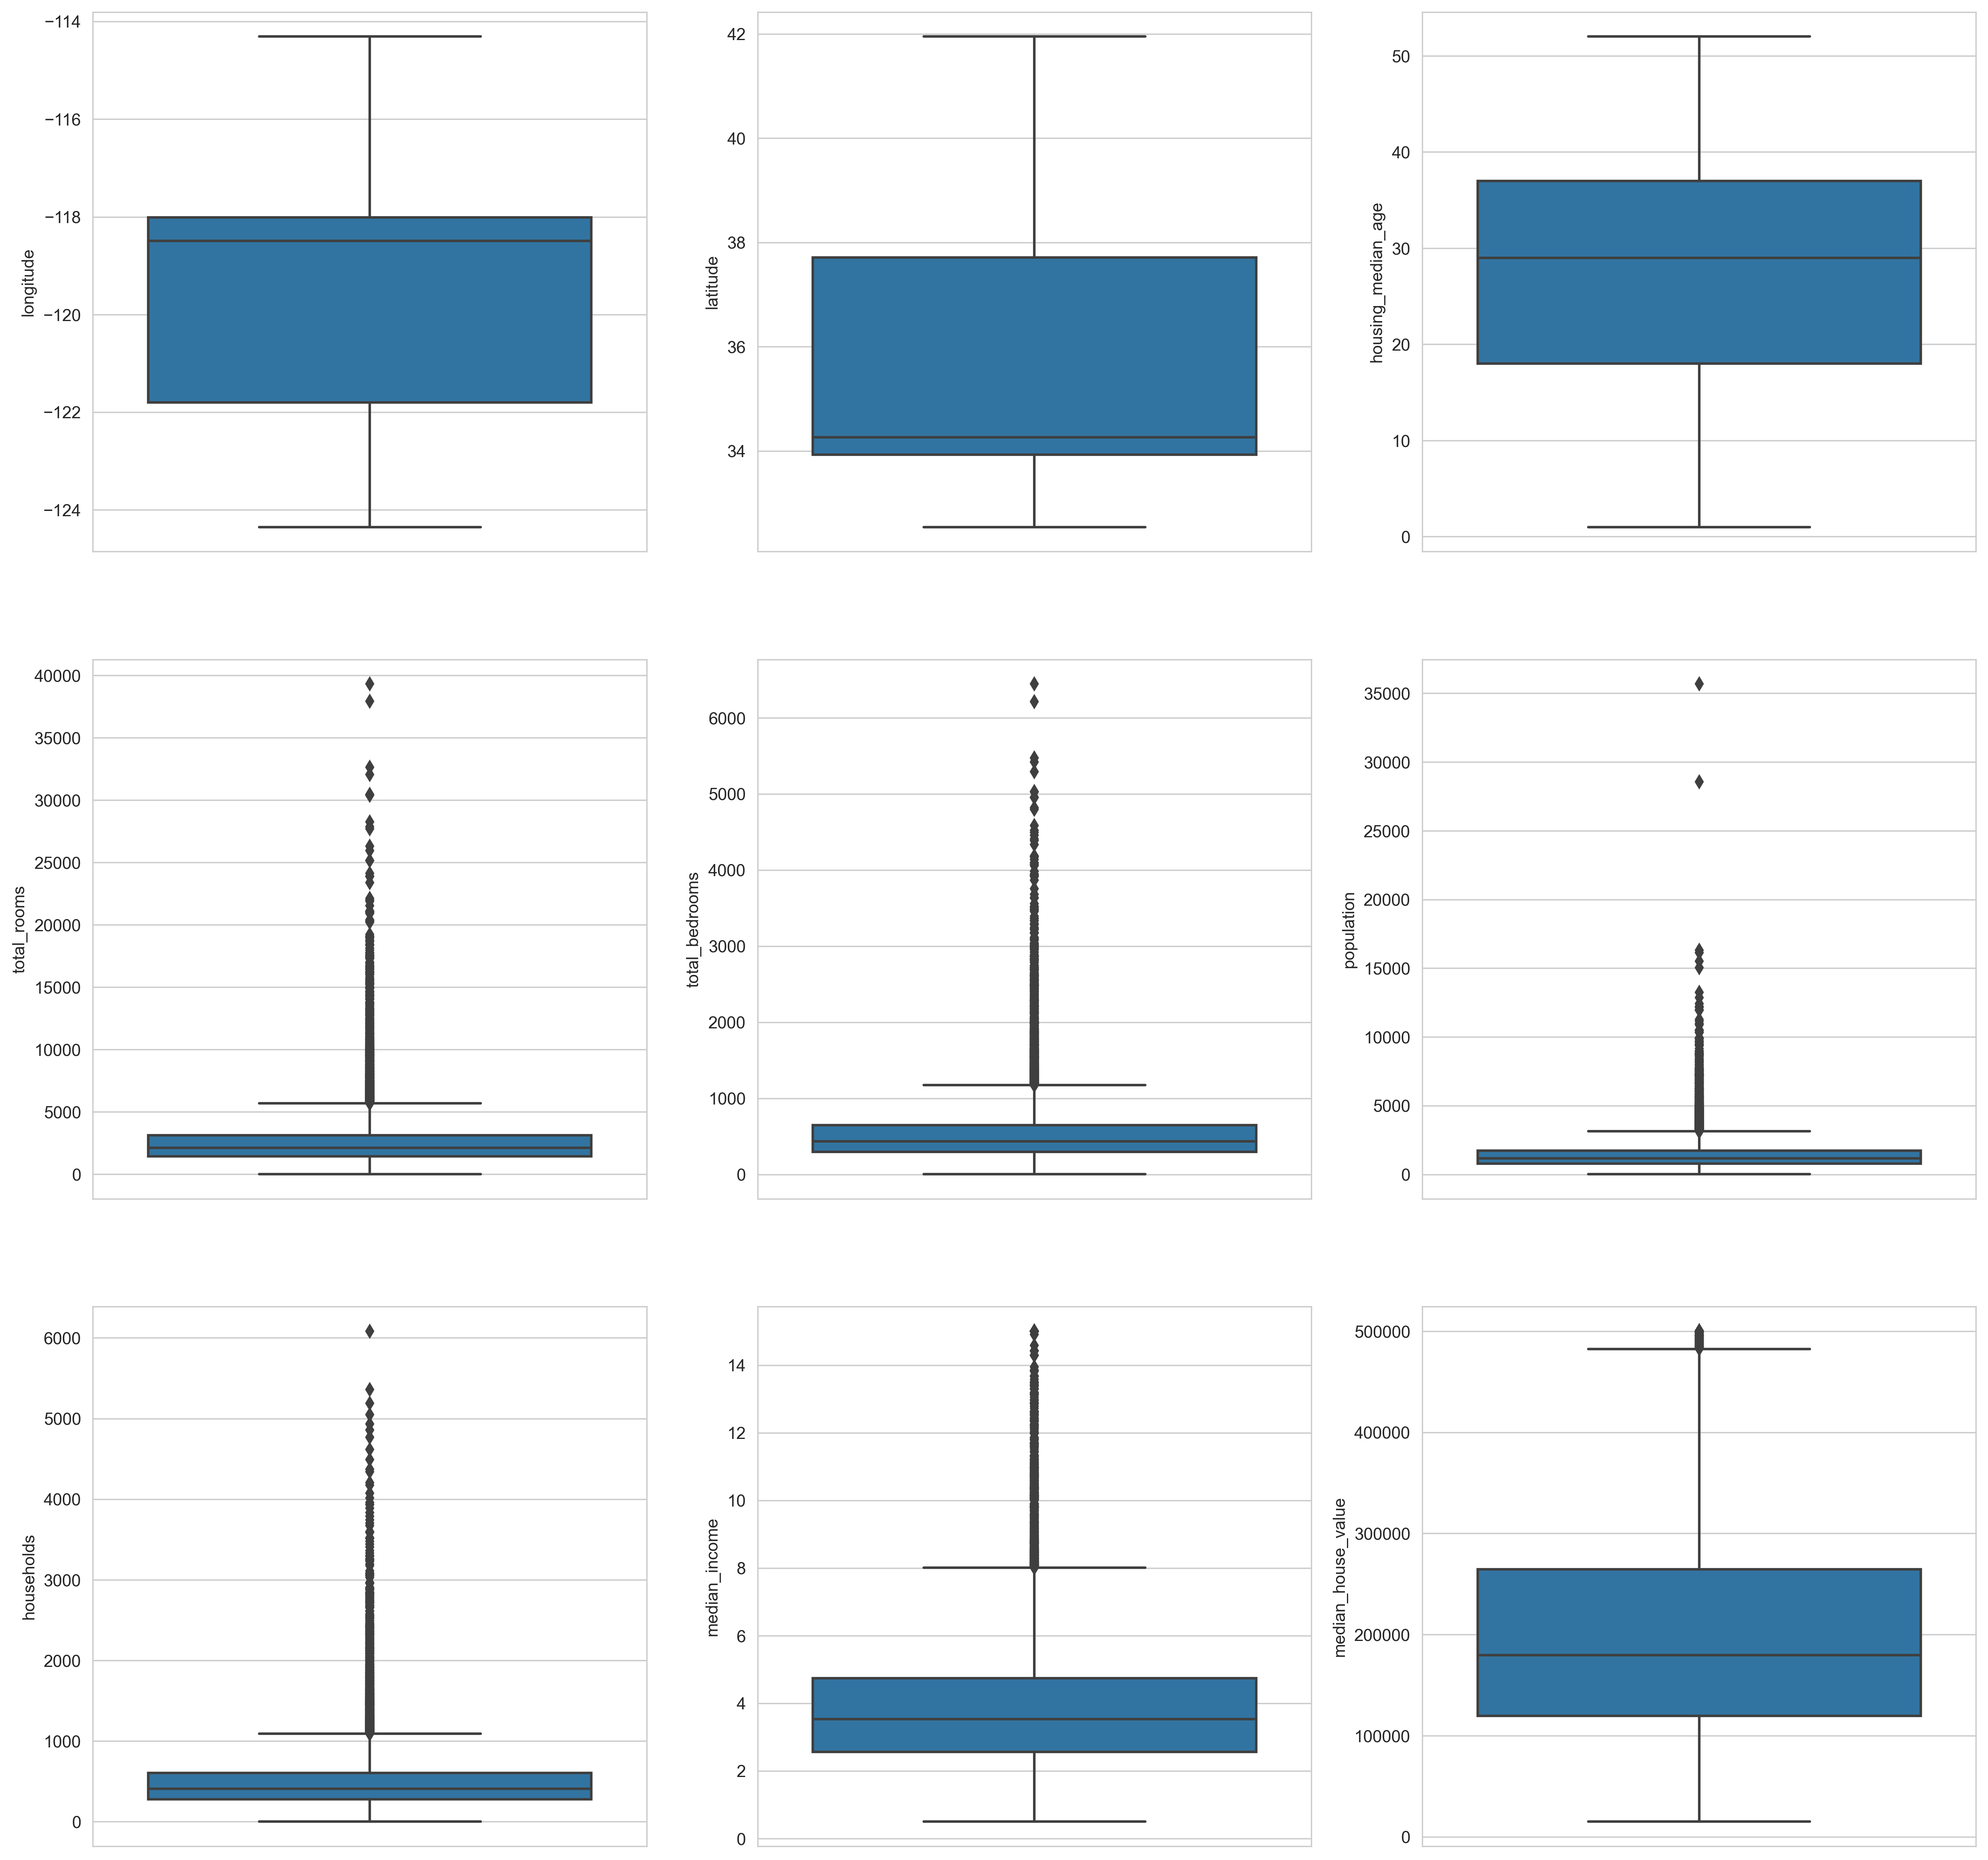

In [13]:
def create_boxplots_in_subplots(data, numeric_columns):
    fig = plt.figure(figsize=(20, 20), dpi=300)
    for i in range(len(numeric_columns)):
        ax = fig.add_subplot(3, 3, i+1)
        ax = sns.boxplot(y=data[numeric_columns[i]])

create_boxplots_in_subplots(data, numeric_columns)

**Summary**
The boxplots show that some numeric attributes have outliers greater than the upper bound (total_rooms, total bedrooms, population, households, median_income, and median_house_value).

## Categorical Attribute

In [14]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**Summary**
ocean_proximity is a categorical attribute with five unique values.

## Takeaway and Next Step

From the EDA, we have the following findings.  

In genereal, regions near Pacific have more households and higher house values. As a comparison, household in the regions away from the Pacific are sparse, and the houses are less expensive. 

**Numeric attributes**

*Skewness*

- Most of them are not normally distributed (skewed to different extent). -> We need to adjust the skewness. 

*Corerlation* 

- Some numeric predictors are collreated with each other. -> Naive Bayes may not be a good model. 

- The median_income is positively correlated to median_house_value. -> It plays a more important role while predicting the median_house_values. 

*Outliers*

- Most of the numeric attributes have outliers. -> We need to remove them.

**Categorical attribute**

*Unique values*

- There is one categorical attribute, and it has five unique values. -> We need to do one-hot encoding for the categorical attribute. 
